<a href="https://colab.research.google.com/github/manolosake/DataScience/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

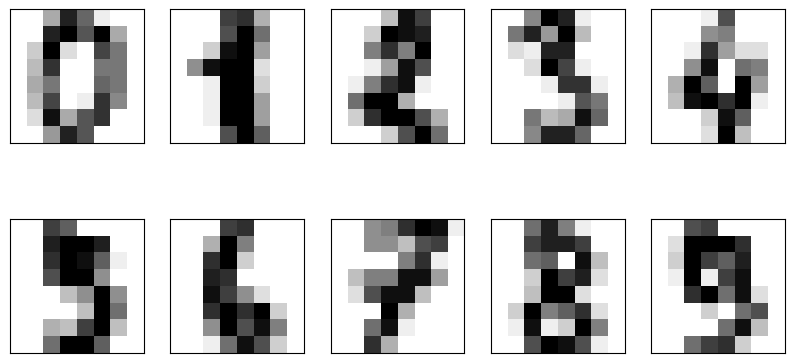

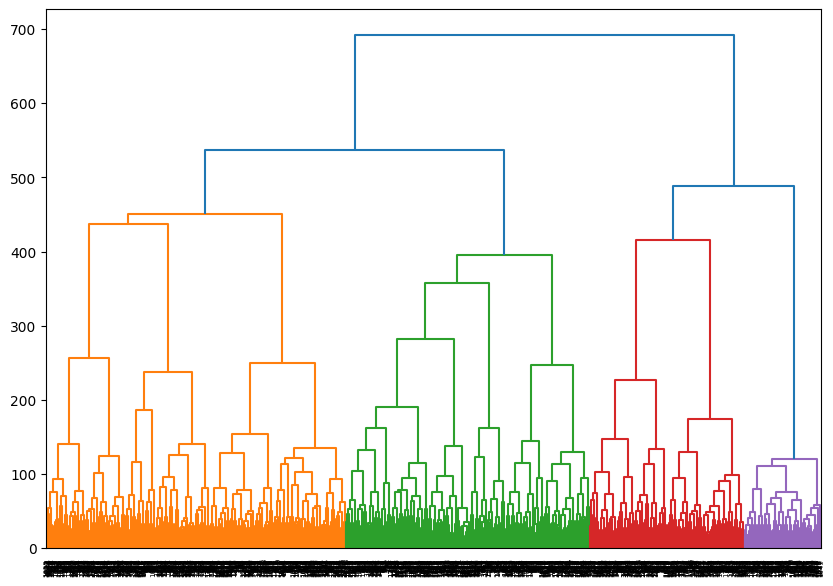

In [2]:
#Hierarchical clustering
#Agglomerative (bottom-up)

# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from scipy.cluster.hierarchy import dendrogram, linkage

# Load digits dataset
digits = load_digits()
X = digits.data

# Visualize the first few images
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])
plt.show()

# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

Cluster 1 has 178 elements.
Cluster 2 has 181 elements.
Cluster 3 has 178 elements.
Cluster 4 has 196 elements.
Cluster 5 has 80 elements.
Cluster 6 has 98 elements.
Cluster 7 has 191 elements.
Cluster 8 has 317 elements.
Cluster 9 has 197 elements.
Cluster 10 has 181 elements.


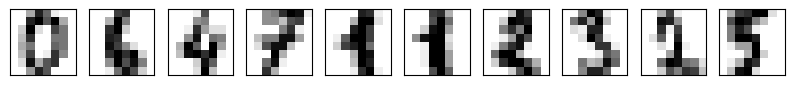

In [3]:
from scipy.cluster.hierarchy import fcluster

# Choose the number of clusters
num_clusters = 10  # for example

# Use fcluster to assign each data point to a cluster
cluster_assignments = fcluster(linked, num_clusters, criterion='maxclust')

# Count the number of elements in each cluster
for i in range(1, num_clusters+1):
    num_in_cluster = sum(cluster_assignments == i)
    print(f"Cluster {i} has {num_in_cluster} elements.")

# Take a sample from each cluster
samples = []
for i in range(1, num_clusters+1):
    cluster_samples = X[cluster_assignments == i]
    samples.append(cluster_samples[0])  # add the first sample from each cluster

# Visualize the samples
fig, ax = plt.subplots(1, num_clusters, figsize=(10, 1))
for i, axi in enumerate(ax.flat):
    axi.imshow(samples[i].reshape(8, 8), cmap='binary')
    axi.set(xticks=[], yticks=[])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


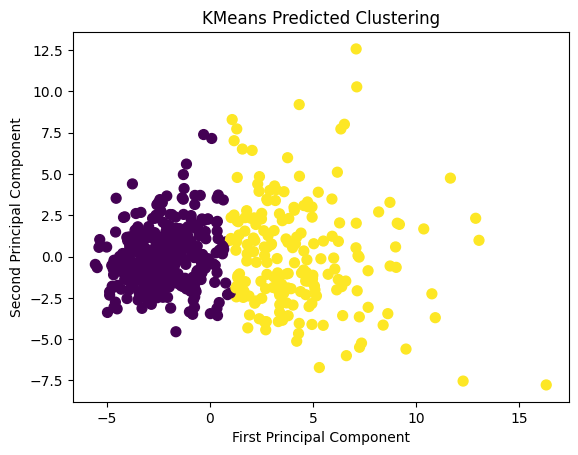

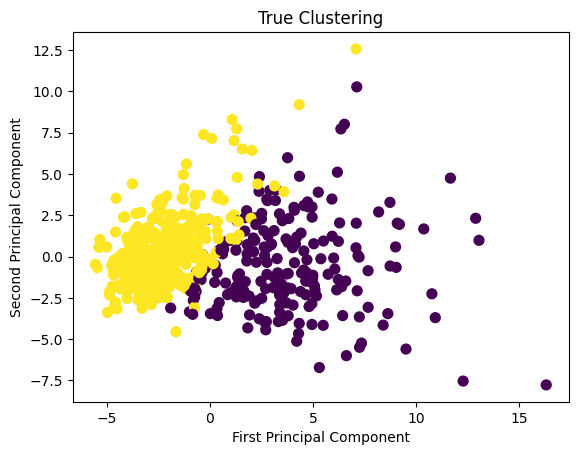

Cluster Centers:
[[-0.48299485 -0.23904142 -0.50041892 -0.47814154 -0.3110035  -0.52601873
  -0.57903569 -0.58717117 -0.30908386 -0.1491409  -0.42798514 -0.02110994
  -0.43097168 -0.40175149 -0.02383127 -0.37020054 -0.3345976  -0.39771232
  -0.07493017 -0.23682231 -0.51785387 -0.25147802 -0.53231144 -0.49935772
  -0.31607814 -0.49224121 -0.53684332 -0.58010099 -0.30335497 -0.33672889]
 [ 0.93362406  0.4620646   0.96730462  0.92424266  0.60116657  1.01678879
   1.11927003  1.13499581  0.59745592  0.28828783  0.82729086  0.0408053
   0.83306382  0.77658149  0.0460656   0.71559384  0.64677371  0.76877382
   0.14483925  0.45777508  1.00100618  0.48610441  1.02895252  0.96525332
   0.61097579  0.95149718  1.0377126   1.12132923  0.58638203  0.65089347]]


Labels:
[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0

In [5]:
#Partial clustering
#K-means

# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load breast_cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target  # true labels

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Apply KMeans and plot the clusters
kmeans = KMeans(n_clusters=2, random_state=0)  # We use 2 clusters because our target is binary (benign or malignant)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the predicted clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.title('KMeans Predicted Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Plot the true clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis')
plt.title('True Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Analyze the results
print('Cluster Centers:')
print(kmeans.cluster_centers_)
print('\n')
print('Labels:')
print(labels)